# Simulations for prey-predator models with exogenous mortality source affecting both predators and preys

In [1]:
#Import librairies
import numpy as np
import matplotlib.pyplot as plt

#Import the module and make it reload each time there is a change 
import importlib
import double_exo
importlib.reload(double_exo)

<module 'double_exo' from 'c:\\Users\\ainat\\Internship_CACOLAC\\sim_models\\First_sim_CACOLAC\\double_exo.py'>

## 1. Impulsive model

### The model


\begin{cases}
\dot{x} = g(x)x - f(x,y)y\\ 
\dot{y} = \gamma f(x,y) y - m(x,y)y\\
x(nT^{+}) = x(nT) - E_xh_x(x(nT))\\
y(nT^{+}) = y(nT) - E_yh_y(y(nT))\\
\end{cases} 

In [2]:
#Set the parameters that will be used all along the code
r = 0.5
K = 10 
a = 0.1
#c = 1
m = 0.1
gamma = 0.8
#b = 0.5
#q = 0.1

E_x = 0.1
E_y = 0.05 #Usually half of E_x
T = 1

t_0 = 0
t_n = 20

tt = 1 #just to not have a missing argument t when we solve models

I0 = 0 #The first value of the integral of x (always 0)

In [3]:
#Other initial values but the periodic solution
x0_a = 5 
y0_a = 1
x0y0_a = [x0_a, y0_a, I0]

x0_b = 7.5
y0_b = 2
x0y0_b = [x0_b, y0_b, I0]

x0_c = 10
y0_c = 3
x0y0_c = [x0_c, y0_c, I0]

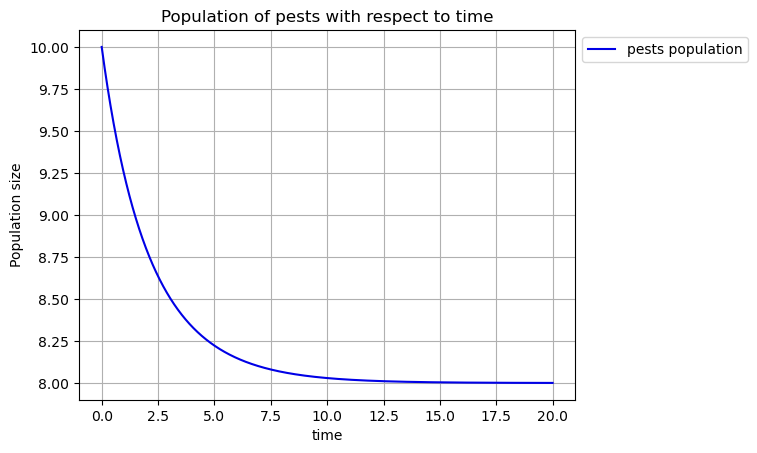

In [4]:
xyI_a = double_exo.solve_predator_prey_model(
        xyI=[K,0,0],
        t=tt,
        gamma=gamma,
        E_x=E_x, #useless because it will be multiplied by 0. It's just to not lose the E
        E_y=E_y, #useless because it will be multiplied by 0. It's just to not lose the E
        T=T,
        func_g=double_exo.logistic_sub_E_x,
        kwargs_g={'r':r, 'K':K, 'E_x':0.1},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.id_plus_E,
        kwargs_m={'z': m, 'E': E_y},
        func_h_x=double_exo.return_zero_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, 
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_a = xyI_a[1]
y_a = xyI_a[2]
I_a = xyI_a[3]

#time points
t = xyI_a[0]

plt.plot(t, x_a, color = (0,0,0.9), linestyle='-', label=f'pests population')
#plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pests with respect to time')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

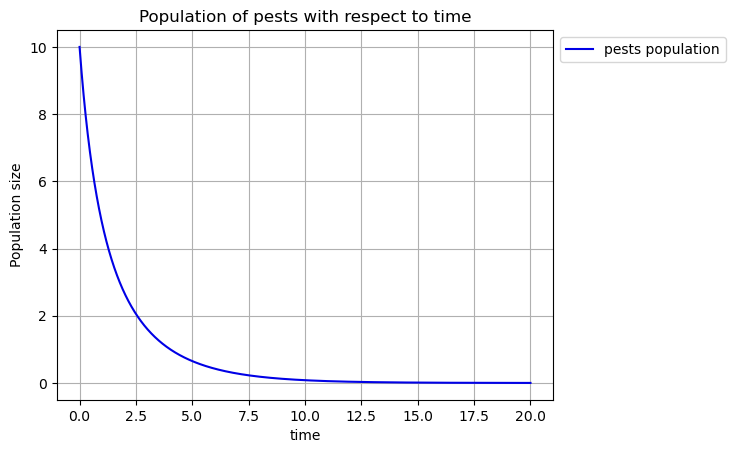

In [5]:
xyI_b = double_exo.solve_predator_prey_model(
        xyI=[K,0,0],
        t=tt,
        gamma=gamma,
        E_x=E_x, #useless because it will be multiplied by 0. It's just to not lose the E
        E_y=E_y, #useless because it will be multiplied by 0. It's just to not lose the E
        T=T,
        func_g=double_exo.logistic_sub_E_x,
        kwargs_g={'r':r, 'K':K, 'E_x':0.9},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.id_plus_E,
        kwargs_m={'z': m, 'E': E_y},
        func_h_x=double_exo.return_zero_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, 
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_b = xyI_b[1]
y_b = xyI_b[2]
I_b = xyI_b[3]

#time points
t = xyI_b[0]

plt.plot(t, x_b, color = (0,0,0.9), linestyle='-', label=f'pests population')
#plt.plot(t, y_b, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pests with respect to time')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

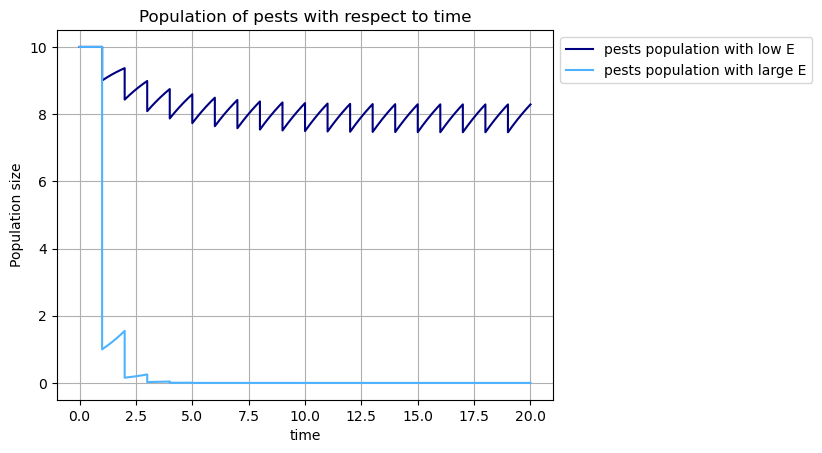

In [36]:
xyI_a = double_exo.solve_predator_prey_model(
        xyI=[K,0,0],
        t=tt,
        gamma=gamma,
        E_x=E_x, #useless because it will be multiplied by 0. It's just to not lose the E
        E_y=E_y, #useless because it will be multiplied by 0. It's just to not lose the E
        T=T,
        func_g=double_exo.logistic_model_x,
        kwargs_g={'r':r, 'K':K},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.id_plus_E,
        kwargs_m={'z': m, 'E': E_y},
        func_h_x=double_exo.return_x_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, 
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_a = xyI_a[1]
y_a = xyI_a[2]
I_a = xyI_a[3]

xyI_b = double_exo.solve_predator_prey_model(
        xyI=[K,0,0],
        t=tt,
        gamma=gamma,
        E_x=0.9, #useless because it will be multiplied by 0. It's just to not lose the E
        E_y=E_y, #useless because it will be multiplied by 0. It's just to not lose the E
        T=T,
        func_g=double_exo.logistic_model_x,
        kwargs_g={'r':r, 'K':K},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.id_plus_E,
        kwargs_m={'z': m, 'E': E_y},
        func_h_x=double_exo.return_x_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, 
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_b = xyI_b[1]
y_b = xyI_b[2]
I_b = xyI_b[3]

#time points
t = xyI_b[0]

plt.plot(t, x_a, color = (0,0,0.5), linestyle='-', label=f'pests population with low E')
plt.plot(t, x_b, color = (0.3,0.7,1), linestyle='-', label=f'pests population with large E')
#plt.plot(t, y_b, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pests with respect to time')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

### 1.1 Test with no harvesting on y.

#### 1.1.1 Lotka-Volterra model with logistic growth 

Solve the ODE with other initial values but the periodic solution

In [22]:
#x and y points for different initial values
xy_a = double_exo.solve_predator_prey_model(
        xyI=x0y0_a,
        t=tt,
        gamma=gamma,
        E_x=E_x,
        E_y=E_y,
        T=T,
        func_g=double_exo.logistic_model_x,
        kwargs_g={'r':r, 'K':K},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        func_h_x=double_exo.return_x_x, #proportional harvesting
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, #No harvesting on y
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_a = xy_a[1]
y_a = xy_a[2]
I_a = xy_a[3]


xy_b = double_exo.solve_predator_prey_model(
        xyI=x0y0_b,
        t=tt,
        gamma=gamma,
        E_x=E_x,
        E_y=E_y,
        T=T,
        func_g=double_exo.logistic_model_x,
        kwargs_g={'r':r, 'K':K},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        func_h_x=double_exo.return_x_x, #proportional harvesting
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, #No harvesting on y
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_b = xy_b[1]
y_b = xy_b[2]
I_b = xy_b[3]


xy_c = double_exo.solve_predator_prey_model(
        xyI=x0y0_c,
        t=tt,
        gamma=gamma,
        E_x=E_x,
        E_y=E_y,
        T=T,
        func_g=double_exo.logistic_model_x,
        kwargs_g={'r':r, 'K':K},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        func_h_x=double_exo.return_x_x, #proportional harvesting
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, #No harvesting on y
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n 
        )
x_c = xy_c[1]
y_c = xy_c[2]
I_c = xy_c[3]



#time points
t = xy_a[0]

Plot results

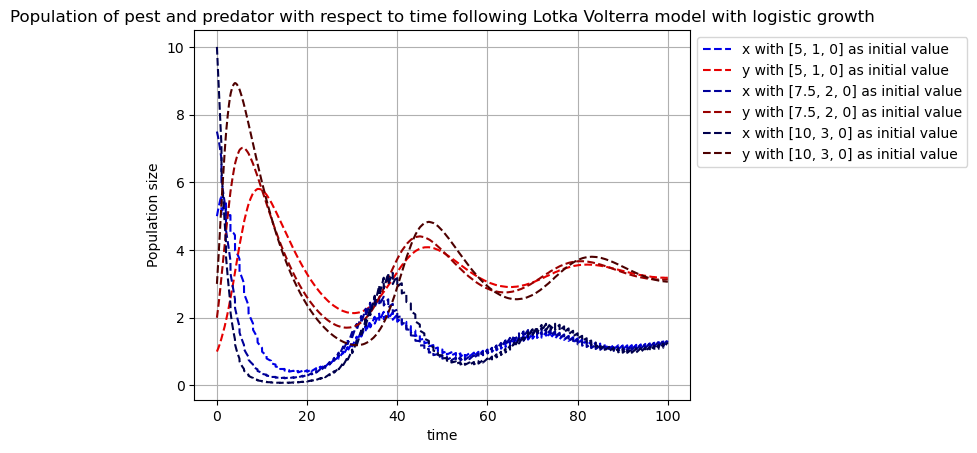

In [23]:
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a} as initial value')
plt.plot(t, x_b, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_b} as initial value')
plt.plot(t, y_b, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_b} as initial value')
plt.plot(t, x_c, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_c} as initial value')
plt.plot(t, y_c, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_c} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time following Lotka Volterra model with logistic growth')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

We get the same result as in ```exo_sim.ipynb```

#### 1.1.2 Classic Lotka-Volterra model

Solve the ODE with other initial values but the periodic solution

In [24]:
#x and y points for different initial values
xyI_a = double_exo.solve_predator_prey_model(
        xyI=x0y0_a,
        t=tt,
        gamma=gamma,
        E_x=E_x,
        E_y=E_y,
        T=T,
        func_g=double_exo.identity_x,
        kwargs_g={'z':r},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        func_h_x=double_exo.return_x_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, #No harvesting on y
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_a = xyI_a[1]
y_a = xyI_a[2]
I_a = xyI_a[3]


xyI_b = double_exo.solve_predator_prey_model(
        xyI=x0y0_b,
        t=tt,
        gamma=gamma,
        E_x=E_x,
        E_y=E_y,
        T=T,
        func_g=double_exo.identity_x,
        kwargs_g={'z':r},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        func_h_x=double_exo.return_x_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, #No harvesting on y
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_b = xyI_b[1]
y_b = xyI_b[2]
I_b = xyI_b[3]


xyI_c = double_exo.solve_predator_prey_model(
        xyI=x0y0_c,
        t=tt,
        gamma=gamma,
        E_x=E_x,
        E_y=E_y,
        T=T,
        func_g=double_exo.identity_x,
        kwargs_g={'z':r},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        func_h_x=double_exo.return_x_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, #No harvesting on y
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n 
        )
x_c = xyI_c[1]
y_c = xyI_c[2]
I_c = xyI_c[3]



#time points
t = xyI_a[0]

Plot results

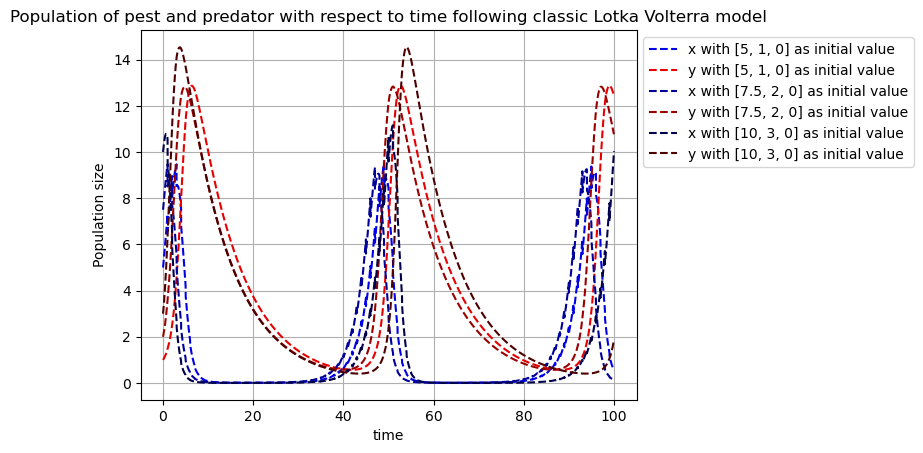

In [25]:
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a} as initial value')
plt.plot(t, x_b, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_b} as initial value')
plt.plot(t, y_b, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_b} as initial value')
plt.plot(t, x_c, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_c} as initial value')
plt.plot(t, y_c, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_c} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time following classic Lotka Volterra model')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

We get the same result as in ```exo_sim.ipynb```

### 1.2 Harvesting on both

#### 1.2.1 Lotka-Volterra model with logistic growth and proportional harvesting

Solve the ODE with other initial values but the periodic solution

In [26]:
#x and y points for different initial values
xyI_a = double_exo.solve_predator_prey_model(
        xyI=x0y0_a,
        t=tt,
        gamma=gamma,
        E_x=E_x,
        E_y=E_y,
        T=T,
        func_g=double_exo.logistic_model_x,
        kwargs_g={'r':r, 'K':K},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        func_h_x=double_exo.return_x_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_y_y, 
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_a = xyI_a[1]
y_a = xyI_a[2]
I_a = xyI_a[3]


xyI_b = double_exo.solve_predator_prey_model(
        xyI=x0y0_b,
        t=tt,
        gamma=gamma,
        E_x=E_x,
        E_y=E_y,
        T=T,
        func_g=double_exo.logistic_model_x,
        kwargs_g={'r':r, 'K':K},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        func_h_x=double_exo.return_x_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_y_y, 
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_b = xyI_b[1]
y_b = xyI_b[2]
I_b = xyI_b[3]


xyI_c = double_exo.solve_predator_prey_model(
        xyI=x0y0_c,
        t=tt,
        gamma=gamma,
        E_x=E_x,
        E_y=E_y,
        T=T,
        func_g=double_exo.logistic_model_x,
        kwargs_g={'r':r, 'K':K},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        func_h_x=double_exo.return_x_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_y_y, 
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n 
        )
x_c = xyI_c[1]
y_c = xyI_c[2]
I_c = xyI_c[3]



#time points
t = xyI_a[0]

Plot results

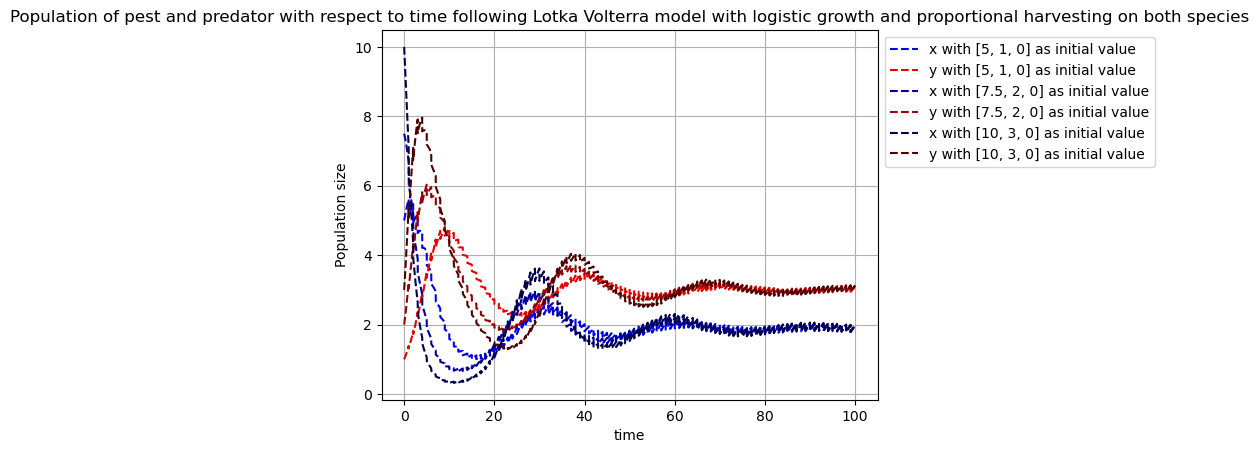

In [27]:
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a} as initial value')
plt.plot(t, x_b, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_b} as initial value')
plt.plot(t, y_b, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_b} as initial value')
plt.plot(t, x_c, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_c} as initial value')
plt.plot(t, y_c, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_c} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time following Lotka Volterra model with logistic growth and proportional harvesting on both species')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

#### 1.2.2 

Solve the ODE with other initial values but the periodic solution

Plot results

In [28]:
'''plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a} as initial value')
plt.plot(t, x_b, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_b} as initial value')
plt.plot(t, y_b, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_b} as initial value')
plt.plot(t, x_c, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_c} as initial value')
plt.plot(t, y_c, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_c} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time ...')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()'''

"plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')\nplt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a} as initial value')\nplt.plot(t, x_b, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_b} as initial value')\nplt.plot(t, y_b, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_b} as initial value')\nplt.plot(t, x_c, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_c} as initial value')\nplt.plot(t, y_c, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_c} as initial value')\nplt.xlabel('time')\nplt.ylabel('Population size')\nplt.title('Population of pest and predator with respect to time ...')\nplt.legend(loc= 'upper left', bbox_to_anchor=(1,1))\nplt.grid()\nplt.show()"

## 2 Continuous model

### The model

\begin{cases}
\dot{x} = g(x)x - f(x,y)y - E_xx\\ 
\dot{y} = \gamma f(x,y) y - m(x,y)y - E_yy\\
\end{cases} 
It's just the proportional harvesting to make the factorization with $x$ and $y$ easier.
Or we can code a less general but more specific model for continuous model.

With the general model, it can be written as:
\begin{cases}
\dot{x} = [g(x) - E_x]x - f(x,y)y\\ 
\dot{y} = \gamma f(x,y) y - [m(x,y)+E_y]y\\
x(nT^{+}) = x(nT) - E_x \times 0\\
y(nT^{+}) = y(nT) - E_y \times 0\\
\end{cases} 

So those are the parameters :  
```func_g```= double_exo.logistic_sub_E_x,  
```kwargs_g``` = {'r':r, 'K':K, 'E_x':E_x},  
```func_f``` = double_exo.multiply_x,  
```kwargs_f``` = {'z':a},  
```func_m``` = double_exo.id_plus_E,  
```kwargs_m``` = {'z':m, 'E':E_y},  
```func_h_x``` = double_exo.return_zero_x,  
```kwargs_h_x```= {},  
```func_h_y```= double_exo.return_zero_y,   
```kwargs_h_y```= {}  

#### Run the model

Solve the ODE with other initial values but the periodic solution

In [29]:
#x and y points for different initial values
xyI_a = double_exo.solve_predator_prey_model(
        xyI=x0y0_a,
        t=tt,
        gamma=gamma,
        E_x=E_x, #useless because it will be multiplied by 0. It's just to not lose the E
        E_y=E_y, #useless because it will be multiplied by 0. It's just to not lose the E
        T=T,
        func_g=double_exo.logistic_sub_E_x,
        kwargs_g={'r':r, 'K':K, 'E_x':E_x},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.id_plus_E,
        kwargs_m={'z': m, 'E': E_y},
        func_h_x=double_exo.return_zero_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, 
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_a = xyI_a[1]
y_a = xyI_a[2]
I_a = xyI_a[3]


xyI_b = double_exo.solve_predator_prey_model(
        xyI=x0y0_b,
        t=tt,
        gamma=gamma,
        E_x=E_x, #useless because it will be multiplied by 0. It's just to not lose the E
        E_y=E_y, #useless because it will be multiplied by 0. It's just to not lose the E
        T=T,
        func_g=double_exo.logistic_sub_E_x,
        kwargs_g={'r':r, 'K':K, 'E_x':E_x},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.id_plus_E,
        kwargs_m={'z': m, 'E': E_y},
        func_h_x=double_exo.return_zero_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, 
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_b = xyI_b[1]
y_b = xyI_b[2]
I_b = xyI_b[3]


xyI_c = double_exo.solve_predator_prey_model(
        xyI=x0y0_c,
        t=tt,
        gamma=gamma,
        E_x=E_x, #useless because it will be multiplied by 0. It's just to not lose the E
        E_y=E_y, #useless because it will be multiplied by 0. It's just to not lose the E
        T=T,
        func_g=double_exo.logistic_sub_E_x,
        kwargs_g={'r':r, 'K':K, 'E_x':E_x},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.id_plus_E,
        kwargs_m={'z': m, 'E': E_y},
        func_h_x=double_exo.return_zero_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, 
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n 
        )
x_c = xyI_c[1]
y_c = xyI_c[2]
I_c = xyI_c[3]



#time points
t = xyI_a[0]

Plot results

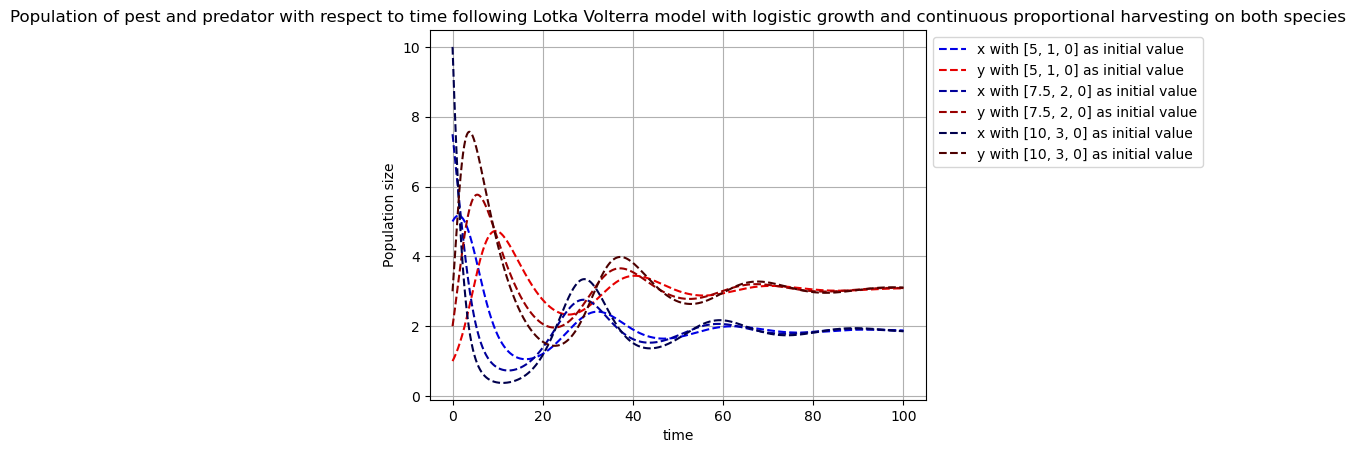

In [30]:
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a} as initial value')
plt.plot(t, x_b, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_b} as initial value')
plt.plot(t, y_b, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_b} as initial value')
plt.plot(t, x_c, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_c} as initial value')
plt.plot(t, y_c, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_c} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time following Lotka Volterra model with logistic growth and continuous proportional harvesting on both species')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

## 3 Comparison

We want to compare the continuous model with exogenous mortality on $x$, and the impulsive model with exogenous mortality on $x$. With our formalism, we have got the following models.

#### Continuous model

\begin{cases}
\dot{x} = rx(1-\frac{x}{K})- axy- E_xx\\ 
\dot{y} = \gamma a x y - my\\
\end{cases} 


Those are the parameters :  
```func_g```= double_exo.logistic_sub_E_x,  
```kwargs_g``` = {'r':r, 'K':K, 'E_x':E_x},  
```func_f``` = double_exo.multiply_x,  
```kwargs_f``` = {'z':a},  
```func_m``` = double_exo.identity,  
```kwargs_m``` = {'z':m,},  
```func_h_x``` = double_exo.return_zero_x,  
```kwargs_h_x```= {},  
```func_h_y```= double_exo.return_zero_y,   
```kwargs_h_y```= {}  

#### Impulsive model


\begin{cases}
    \dot{x} = rx(1-\frac{x}{K}) - axy\\ 
    \dot{y} = \gamma a x y - my\\
    x(nT^{+}) = e^{-E_xT}x(nT) = x(nT) - (1 - e^{-E_xT})x(nT)
\end{cases}


Those are the parameters :  
```E_x``` = np.exp(-E_x*T),  
```func_g```= double_exo.logistic_model_x,  
```kwargs_g``` = {'r':r, 'K':K},  
```func_f``` = double_exo.multiply_x,  
```kwargs_f``` = {'z':a},  
```func_m``` = double_exo.identity,  
```kwargs_m``` = {'z':m},  
```func_h_x``` = double_exo.return_x_x,  
```kwargs_h_x```= {},  
```func_h_y```= double_exo.return_zero_y,   
```kwargs_h_y```= {}  

### 3.1 Using integral

#### 3.1.1 Parameter changed : $(x_{0,a},y_{0,a}) = (5,1)$

Solve ODE

In [31]:
#Continuous
xyI_cont = double_exo.solve_predator_prey_model(
        xyI=x0y0_a,
        t=tt,
        gamma=gamma,
        E_x=E_x, #useless because it will be multiplied by 0. It's just to not lose the E
        E_y=E_y, #useless because it will be multiplied by 0. It's just to not lose the E
        T=T,
        func_g=double_exo.logistic_sub_E_x,
        kwargs_g={'r':r, 'K':K, 'E_x':E_x},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        func_h_x=double_exo.return_zero_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, 
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_cont = xyI_cont[1]
y_cont = xyI_cont[2]
I_cont = xyI_cont[3]

#Impulsive
xyI_imp = double_exo.solve_predator_prey_model(
        xyI=x0y0_a,
        t=tt,
        gamma=gamma,
        E_x= 1 - np.exp(-E_x*T), #E for impulsive
        E_y=E_y, #useless because it will be multiplied by 0. It's just to not lose the E
        T=T,
        func_g=double_exo.logistic_model_x,
        kwargs_g={'r':r, 'K':K},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        func_h_x=double_exo.return_x_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, 
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_imp = xyI_imp[1]
y_imp = xyI_imp[2]
I_imp = xyI_imp[3]

In [32]:
print(E_x)
print(T)
print(E_x*T)
print(-E_x*T)
print(np.exp(-E_x*T))
print(1 - np.exp(-E_x*T))

0.1
1
0.1
-0.1
0.9048374180359595
0.09516258196404048


Plot results (only x and y)

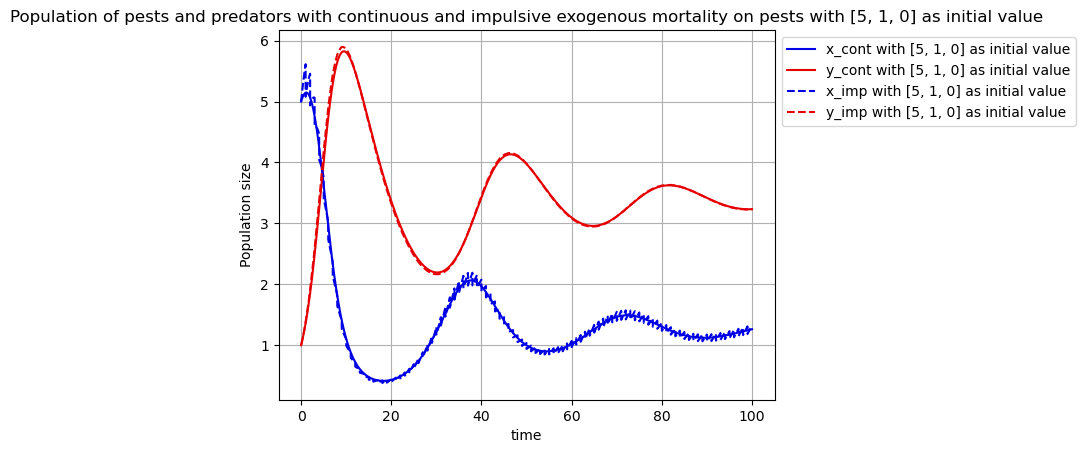

In [33]:
plt.plot(t, x_cont, color = (0,0,0.9), linestyle='-', label=f'x_cont with {x0y0_a} as initial value')
plt.plot(t, y_cont, color = (0.9,0,0), linestyle='-', label=f'y_cont with {x0y0_a} as initial value')
plt.plot(t, x_imp, color = (0,0,0.9), linestyle='--', label=f'x_imp with {x0y0_a} as initial value')
plt.plot(t, y_imp, color = (0.9,0,0), linestyle='--', label=f'y_imp with {x0y0_a} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title(f'Population of pests and predators with continuous and impulsive exogenous mortality on pests with {x0y0_a} as initial value')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

Plot results (only I)

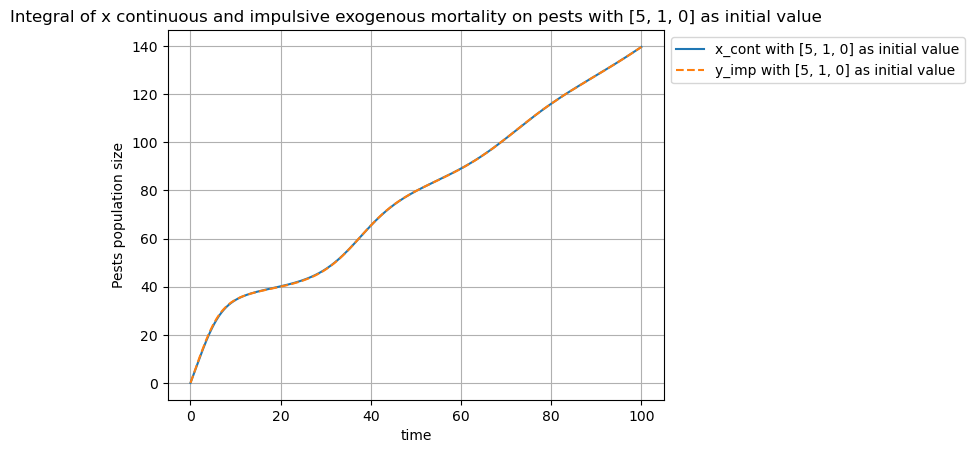

In [34]:
plt.plot(t, I_cont, linestyle='-', label=f'x_cont with {x0y0_a} as initial value')
plt.plot(t, I_imp, linestyle='--', label=f'y_imp with {x0y0_a} as initial value')
plt.xlabel('time')
plt.ylabel('Pests population size')
plt.title(f'Integral of x continuous and impulsive exogenous mortality on pests with {x0y0_a} as initial value')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

At small $T$ they are very close. 
We can create a new notebook called ```cont_imp_comparison.ipynb``` where we vary $T$ then $E$. 

### 3.2 Using a threshold
Watch out, for the threshold, $x$ need to not be increasing again. And it may never be attained if there is no eradication.  
Maybe a definitive threshold:  
First condition is being below the threshold.  
Second conditionis that $x$ is never above the threshold again.

Let $\epsilon$ be the threshold.  
We need to find the smallest $t_i$ such that $\forall t > t_i , x(t) < \epsilon$  

The integral is used for every function and the threshold is used only if eradication occurs.